# Time Series Overview - General
> Time series = Trend + [Seasonality] + [cyclic] + [Noise] + [Change point]
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## 1. Basic Concept

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

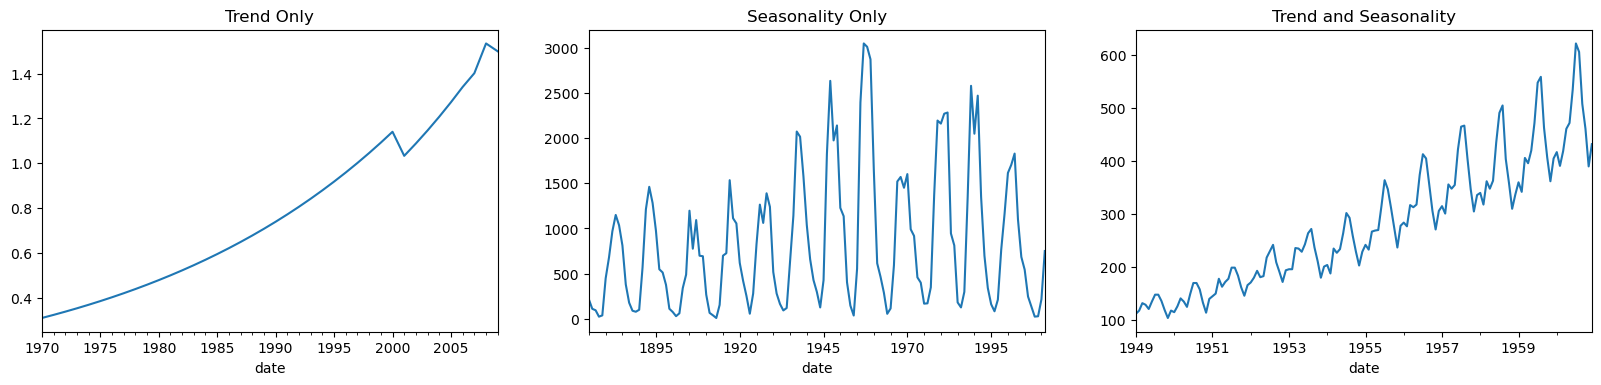

In [3]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Trend Only',
          legend=False,
          ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Seasonality Only',
          legend=False,
          ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Trend and Seasonality',
          legend=False,
          ax=axes[2])

* Additive TS: Trend + [Seasonality|cyclic] + [Noise]
* Multiplicative TS: Trend x [Seasonality|cyclic] x [Noise]

## 2. Decompose Time Series

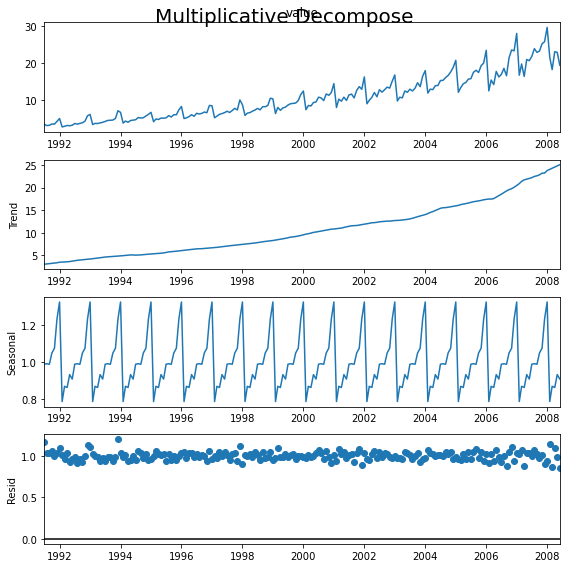

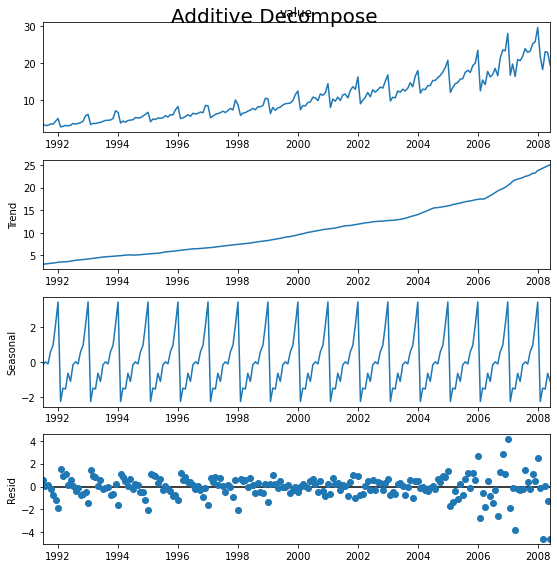

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'],
                                model='multiplicative',
                                extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'],
                                model='additive',
                                extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,8)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()

In this case, Multiplicative better than Additive. Because the residual part of Additive Decompose still left some pattern.

In [12]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [13]:
0.987845 * 3.060085 * 1.166629

3.5265907491183826

## 3. Stationary and Non-Stationary